# Sphericity & Solidity

In this notebook you will learn how to calculate two common 3D shape descriptors for assessing how similar an object is to a perfect sphere. You will also compare object volume measurements from an image and its corresponding mesh representation.

Please download the required file for the variable `binary_gastruloid` from this link and add it to this week's data folder:

<https://drive.google.com/file/d/1zywDJeNinfoJC49qFuskqxQ4HGniGSGK/view?usp=sharing>

You should not need a password.You should have [napari-process-points-and-surfaces](https://www.napari-hub.org/plugins/napari-process-points-and-surfaces) and the [vedo library](https://vedo.embl.es/) installed from last week.

The data used in this notebook is derived from [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode) and can be downloaded from here: https://zenodo.org/record/7603081. Compared to the original, the files used here were generated in the exercise notebooks from Robert's lecture last week.

In [1]:
from __future__ import print_function, division

import napari_process_points_and_surfaces as nppas
import numpy as np
import vedo
from skimage.io import imread, imshow

import matplotlib.pyplot as plt
%matplotlib inline

# Load Image Data

/Users/ryan/mambaforge/envs/devbio-napari-env/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


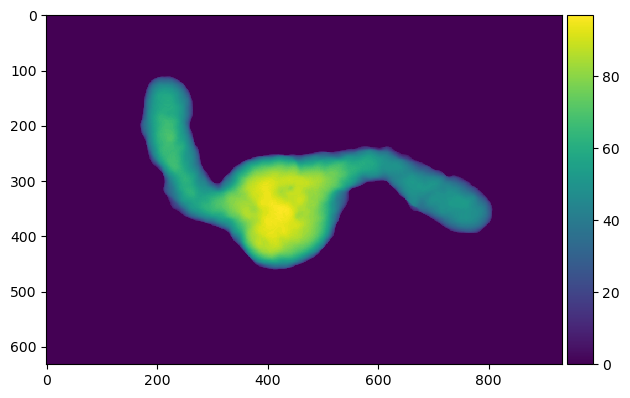

In [2]:
binary_gastruloid = imread('data/binary_gastruloid.tif')
imshow(binary_gastruloid.sum(axis = 0)) # sum projection visualization of binary 3d object

# Load Mesh Data

In [3]:
mesh_gastruloid = vedo.load('data/gastruloid.ply')

# Visualize Mesh

(array([[ 14.457619, 144.76721 , 213.91733 ],
        [ 14.386402, 149.81444 , 216.4062  ],
        [ 14.615121, 150.11465 , 211.54437 ],
        ...,
        [111.80431 , 357.6435  , 415.73914 ],
        [111.70839 , 357.06052 , 429.60495 ],
        [112.188705, 351.27747 , 423.60077 ]], dtype=float32),
 array([[   0,    1,    2],
        [   0,    3,    1],
        [   4,    5,    6],
        ...,
        [3308, 3306, 3307],
        [3299, 3308, 3307],
        [3304, 3308, 3305]]))
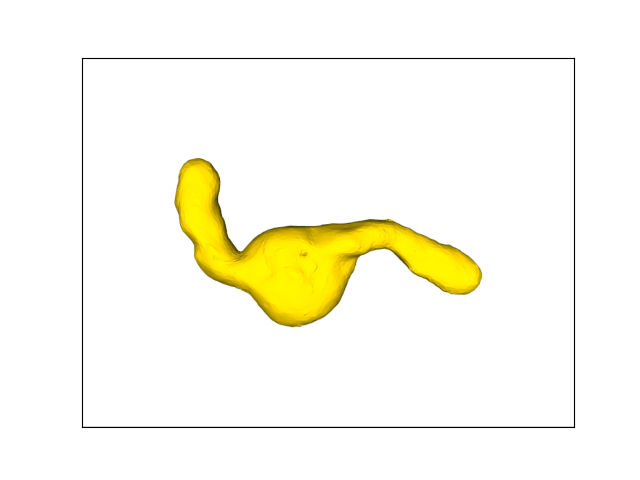

In [4]:
napari_mesh_gastruloid = nppas.to_napari_surface_data(mesh_gastruloid)
napari_mesh_gastruloid

# Mesh Volume

In [5]:
mesh_volume = mesh_gastruloid.volume()
mesh_volume

4690998.704897018

# Mesh Surface Area

In [6]:
mesh_surface_area = mesh_gastruloid.area()
mesh_surface_area

229569.5362677695

# Image Volume

In [7]:
binary_volume = np.sum(binary_gastruloid)
binary_volume

4712181

# Calculate Sphericity

In [8]:
def sphericity(mesh_volume, mesh_surface_area):
    
    '''This definition of sphericity assumes that you are working in continuous space.
    
    Parameters:
    -----------
    
    mesh_volume: integer or float value
    mesh_surface_area: integer or float value
    
    Returns:
    --------
    
    psi: a float value with range(0,1) reflecting the compactness of an object
    '''
    
    numerator = (np.pi ** (1/3)) * ((6 * mesh_volume) ** (2/3))
    denominator = mesh_surface_area
    
    psi = numerator / denominator
    
    return psi

In [9]:
sphericity = sphericity(mesh_volume, mesh_surface_area)
sphericity

0.5903099128683961

# Convex Hull

(array([[ 14.457619, 144.76721 , 213.91733 ],
        [ 15.038892, 143.36473 , 207.20639 ],
        [ 15.429304, 136.4153  , 206.44937 ],
        ...,
        [111.480446, 305.31857 , 394.55396 ],
        [111.84808 , 344.62262 , 418.75836 ],
        [112.188705, 351.27747 , 423.60077 ]], dtype=float32),
 array([[  0,   1,   2],
        [  0,   2,   3],
        [  0,   3,   4],
        ...,
        [812, 807, 817],
        [787, 817, 777],
        [807, 777, 817]]))
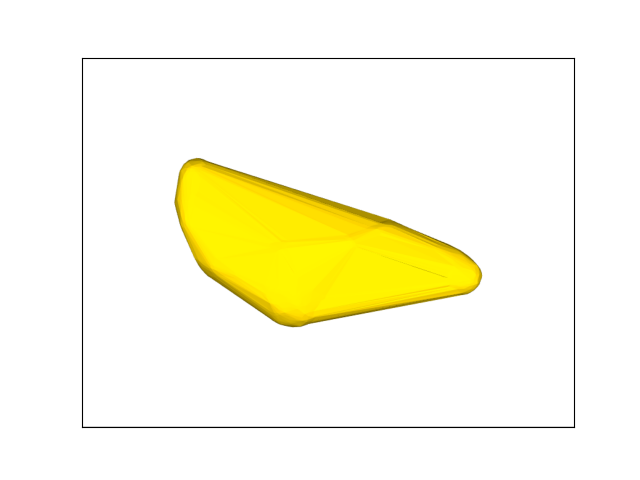

In [10]:
convex_hull_gastruloid = nppas.create_convex_hull_from_surface(napari_mesh_gastruloid)
convex_hull_gastruloid

# Calculate Solidity

Solidity is the ratio of an object's volume to the volume of its convex hull.

In [11]:
convex_hull = nppas.to_vedo_mesh(convex_hull_gastruloid)
convex_hull_volume = convex_hull.volume()
convex_hull_volume

8379992.083160304

In [12]:
gastruloid_solidity = mesh_volume / convex_hull_volume
gastruloid_solidity

0.5597855771634482

# Exercise

Calculate the sphericity of the gastruloid using `image_volume` instead of `mesh_volume` then find the percent difference between the two measurements. Is it statistically significant?